# Introduction

The aim of this project is to predict the risk of osteoporosis in patients using a dataset of patients' medical records. Osteoporosis is a condition that weakens bones, making them fragile and more likely to break. It develops slowly over several years and is often only diagnosed when a minor fall or sudden impact causes a bone fracture. The condition is more common in older people, particularly.|

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [3]:
#checking the number of rows and columns
df.shape

(1958, 16)

# Data Preprocessing 1

In [5]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [10]:
#checking if there is any null values or not
df.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [11]:
df.drop(['Id'], axis = 1) #axis = 1 means columns

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,None,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,None,None,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,None,Hyperthyroidism,None,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [13]:
#checking if there is any duplicates values or not
df.duplicated().sum()

0

In [16]:
#value counts for categorical columns
categorical_columns = df.select_dtypes(include = ['object']).columns
for column in categorical_columns:
    print(df[column].value_counts())

Male      992
Female    966
Name: Gender, dtype: int64
Normal            981
Postmenopausal    977
Name: Hormonal Changes, dtype: int64
No     998
Yes    960
Name: Family History, dtype: int64
African American    681
Caucasian           646
Asian               631
Name: Race/Ethnicity, dtype: int64
Normal         1027
Underweight     931
Name: Body Weight, dtype: int64
Low         1004
Adequate     954
Name: Calcium Intake, dtype: int64
Sufficient      1011
Insufficient     947
Name: Vitamin D Intake, dtype: int64
Active       1021
Sedentary     937
Name: Physical Activity, dtype: int64
Yes    982
No     976
Name: Smoking, dtype: int64
None        988
Moderate    970
Name: Alcohol Consumption, dtype: int64
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: Medical Conditions, dtype: int64
None               985
Corticosteroids    973
Name: Medications, dtype: int64
Yes    983
No     975
Name: Prior Fractures, dtype: int64


In [17]:
#show the statistical values
df.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


# EDA

In the exploratory data analysis, I will be looking at the distribution of the data acroos all the variables and relationships between the variables and the target variable. For this I will be plotting the dataset variables in different graphs and draw out insights from them

# Target Value Distribution

Text(0.5, 1.0, 'Osteoporosis')

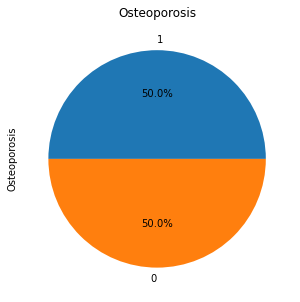

In [19]:
#pie chart for the target value
plt.figure(figsize=(10, 5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis')

he above pie chart shows that the dataset is perfectly balanced with 50% of the patients having osteoporosis and 50% not having osteoporosis, which means that the dataset is not biased towards any class.

# Age and Osteoporosis

Text(0.5, 1.0, 'Osteoporosis by Age')

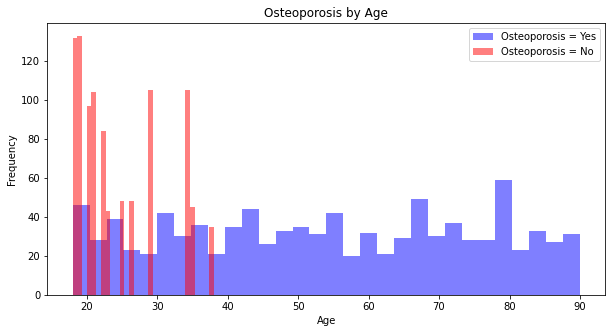

In [20]:
#two layer histogram for the Age and Osteoporosis
plt.figure(figsize=(10,5))
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Osteoporosis = Yes')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='Osteoporosis = No')

#legends and title
plt.legend()
plt.xlabel('Age')
plt.title('Osteoporosis by Age')

This graph shows relation between the risk of osteoporosis and the age of the patient. In the graph we can see that that there is significant risk of osteoporosis in patients of all ages but patients between the ages 20 to 40 have significantly much lower risk of osteoporosis. This highlights that fact that younger patients are less likely to have osteoporosis.

# Gender and Osteoporosis

Text(0.5, 1.0, 'Gender Vs Osteoporosis')

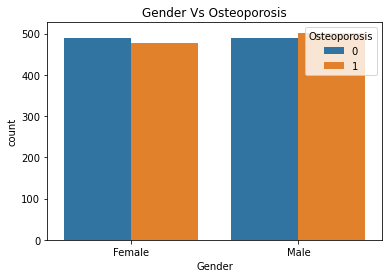

In [22]:
sns.countplot(x ='Gender', data = df, hue = 'Osteoporosis').set_title('Gender Vs Osteoporosis')

In this graph, we can visualize the relationship between gender and the risk of osteoporosis. The graph shows that there is no concrete relationship between gender and the risk of osteoporosis, however, according to the numbers in the dataset, the males tend to have slightly higher number of osteoporosis cases than females, but the difference is not significant. Therefore, gender could be a weak predictor for osteoporosis

# Race/Ethnicity and Osteoporosis

Text(0.5, 1.0, 'Race/Ethnicity and Osteoporosis')

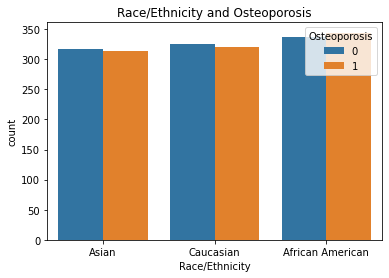

In [23]:
sns.countplot(x = 'Race/Ethnicity', data = df, hue = 'Osteoporosis').set_title('Race/Ethnicity and Osteoporosis')

This graph shows the relationship between Race/Ethnicity and the risk of osteoporosis. The graph shows that the risk of osteoporosis is almost similar with no concrete relationship between the race and risk of osteoporosis.

# Data Preprocessing 2 

In [24]:
#label Encoding for categorical variables


#columns for label encoding
cols = df.select_dtypes(include = ['object']).columns

#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    print(col, ":", df[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


# Correlation matrix heatmap

A heatmap is a data visualization technique that represents the magnitude of a phenomenon as color in two dimensions. It allows you to quickly see patterns, correlations, and anomalies in data. Heatmaps are commonly used in various fields, such as statistics, machine learning, finance, biology, and geography.

<AxesSubplot:>

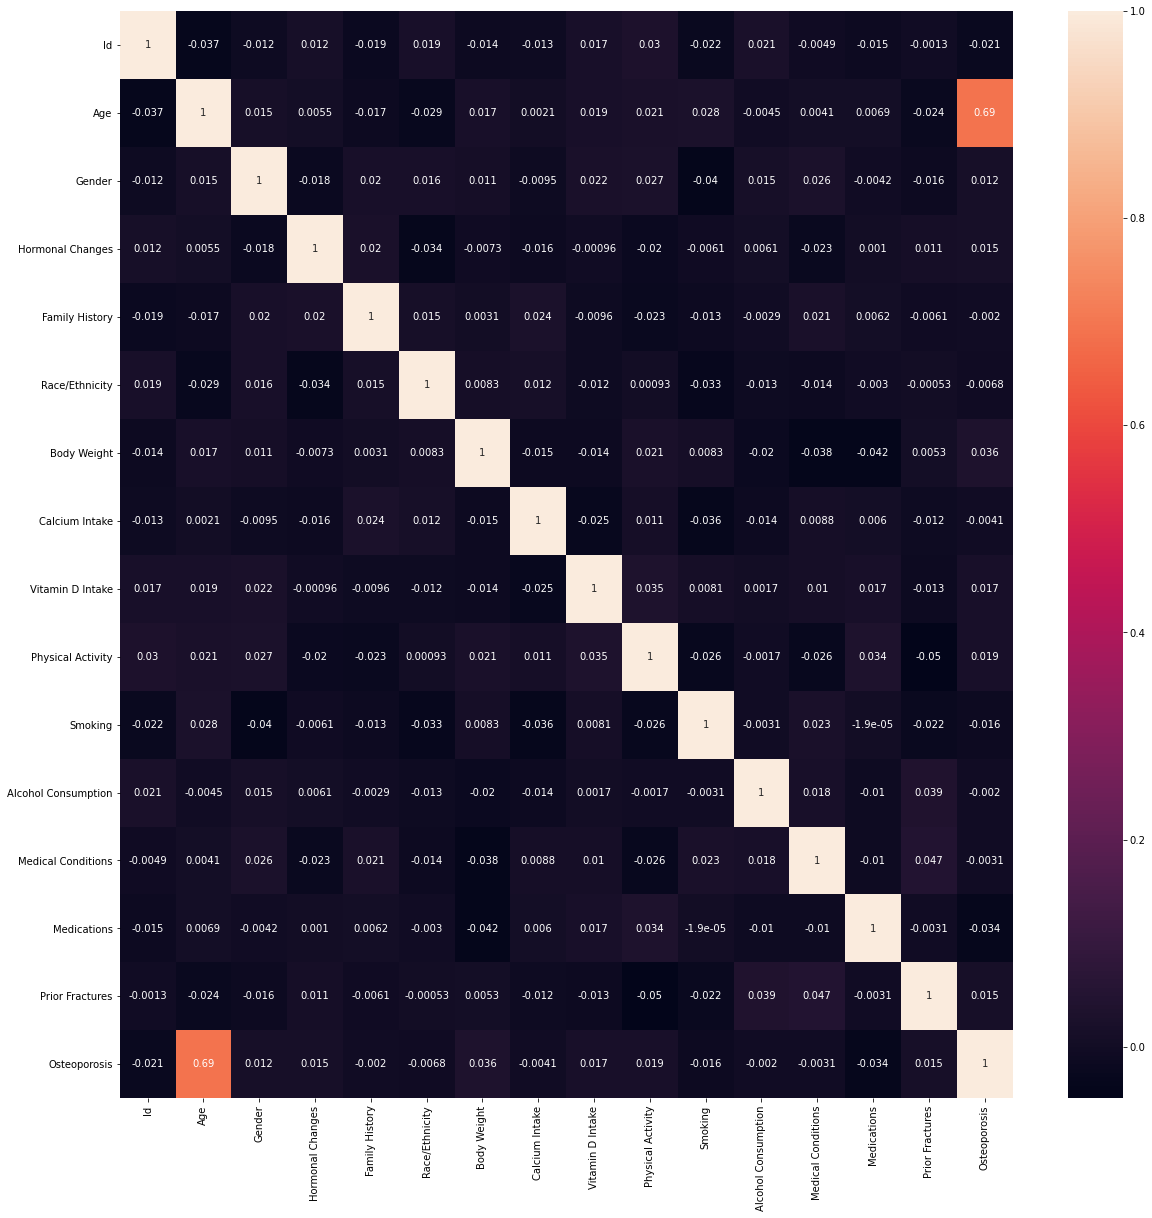

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)

# Train Test Splits

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Osteoporosis', axis = 1), df['Osteoporosis'], test_size = 0.2, random_state = 42)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Hyperparameter Tuning using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'max_iter': [100, 1000, 2500, 5000],
              'multi_class': ['auto', 'ovr'],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(log_model,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'C': 10, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


In [31]:
#logistic regression with best parameters
log_model = LogisticRegression(C=0.1, max_iter=100, penalty='l2', random_state=0, solver='liblinear', multi_class='auto')

#fitting the data
log_model.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",log_model.score(X_train,y_train))

#prediction
lr_pred = log_model.predict(X_test)

Training accuracy: 0.8301404853128991


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

#creating random forest object
rfc = RandomForestClassifier()

# Hyperparameter Tuning using GridSearchCV

In [33]:
#parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2,5,10],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(rfc,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 0}


In [34]:
#random forest with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)

#fitting the data
rfc.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",rfc.score(X_train,y_train))

#prediction
rfc_pred = rfc.predict(X_test)

Training accuracy: 0.9438058748403576


# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

#creating decision tree object
dtree = DecisionTreeClassifier()

# Hyperparameter Tuning using GridSearchCV

In [36]:
#parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2,5,10],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(dtree,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [37]:
#decision tree with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=0)

#fitting the data
dtree.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",dtree.score(X_train,y_train))

#prediction
dtree_pred = dtree.predict(X_test)

Training accuracy: 0.9106002554278416


# Model Evaluation

Text(0.5, 1.0, 'Decision Tree Classifier')

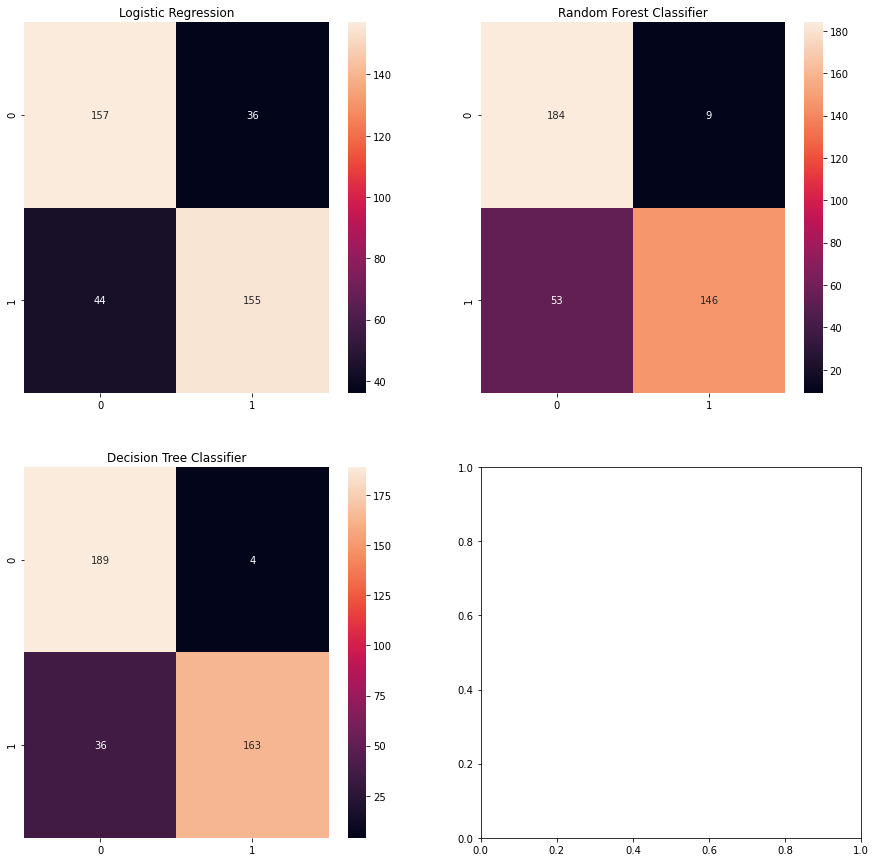

In [41]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

#confusion matrix for logistic regression
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, ax = ax[0,0], fmt='g').set_title('Logistic Regression')

#confusion matrix for random forest
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True, ax = ax[0,1], fmt='g').set_title('Random Forest Classifier')

#confusion matrix for decision tree
cm = confusion_matrix(y_test, dtree_pred)
sns.heatmap(cm, annot=True, ax = ax[1,0], fmt='g').set_title('Decision Tree Classifier')

# Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

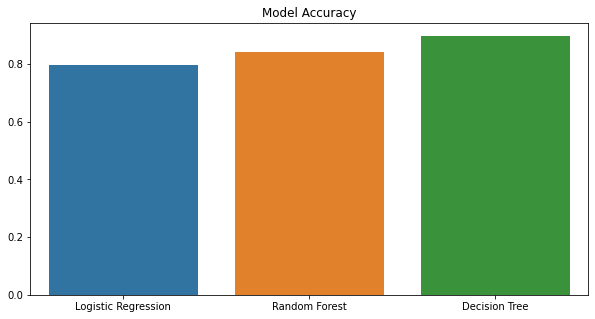

In [42]:
#Bar chart for the accuracy of the models
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtree_pred)]
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy).set_title('Model Accuracy')

We can see the decision tree has the highest accuracy compare to other algorithm

# Model Metrics

Text(0.5, 1.0, 'R2 Score')

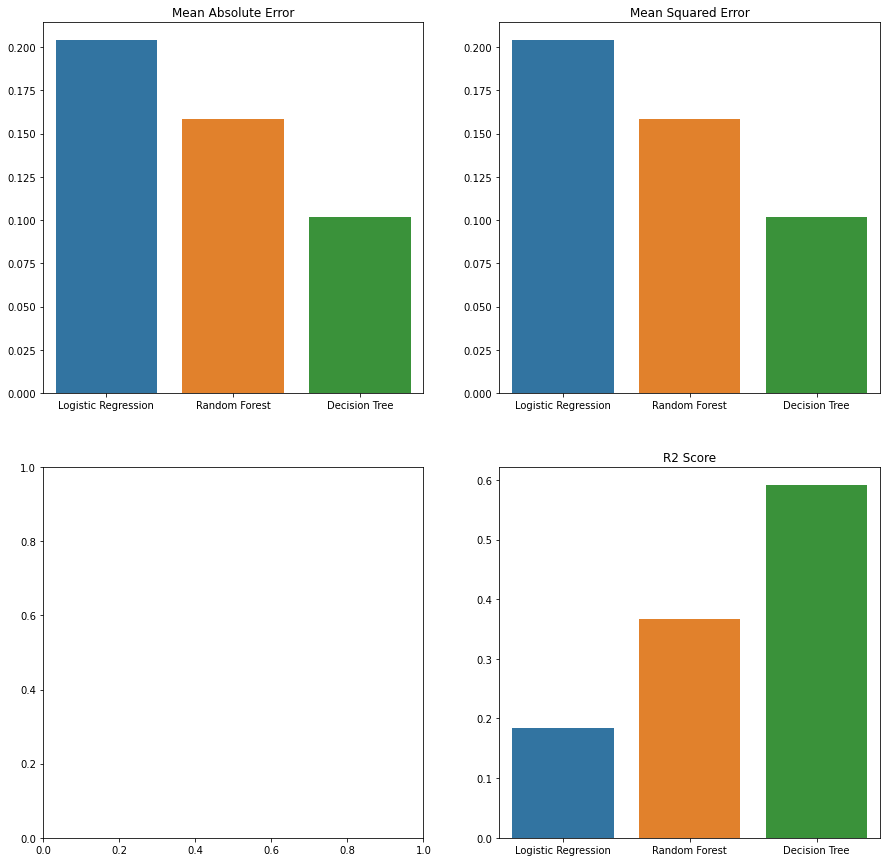

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,

fig, ax = plt.subplots(2,2, figsize=(15, 15))
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
mae = [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, rfc_pred), mean_absolute_error(y_test, dtree_pred)]
mse = [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, rfc_pred), mean_squared_error(y_test, dtree_pred)]
r2 = [r2_score(y_test, lr_pred), r2_score(y_test, rfc_pred), r2_score(y_test, dtree_pred)]

#Mean Absolute Error
sns.barplot(x=models, y=mae, ax=ax[0,0]).set_title('Mean Absolute Error')

#Mean Squared Error
sns.barplot(x=models, y=mse, ax=ax[0,1]).set_title('Mean Squared Error')

#Root Mean Squared Error
sns.barplot(x=models, y=rmse, ax=ax[1,0]).set_title('Root Mean Squared Error')

#R2 Score
sns.barplot(x=models, y=r2, ax=ax[1,1]).set_title('R2 Score')